과제_1. 인구 구조를 시각화하는 프로그램을 작성한다.
- 인구구조를 확인하고 싶은 행정구역(또는 행정구역코드)을 입력 받는다.
- 만0세~만50세 성별 인구비율 파이차트로 표현하기
 - 원하는 지역 입력 받기
 - 시작각도, 색상, 제목, 비율(소수점 둘째자리), 범례 표기 등 (디폴트 값 사용 금지)

만0세 ~ 만50세의 성별 인구 구조를 알고 싶은 행정구역이나 행정구역 코드를 입력하세요!!
삼청동
male:  569 female:  611


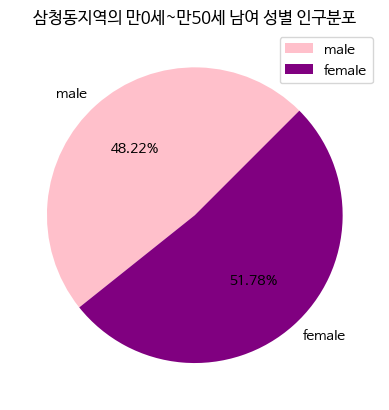

In [10]:
#from google.colab import files
#uploaded = files.upload()

import csv
file=open('age_gender.csv',encoding='cp949')
age=csv.reader(file)

size=[] #남여 인구수 저장할 빈 리스트

name=input('만0세 ~ 만50세의 성별 인구 구조를 알고 싶은 행정구역이나 행정구역 코드를 입력하세요!!\n')

for row in age:
  if name in row[0]: 
    m=0 #남성 인구수 누적해서 더할 변수 초기화
    f=0 #여성 인구수 누적해서 더할 변수 초기화
    for i in range(51): #0세~50세
      m+=int(row[i+3].replace(',','')) #남성 인구수 누적해서 합 구하기
      f+=int(row[i+106].replace(',','')) #여성 인구수 누적해서 합 구하기

size.append(m)
size.append(f)

print('male: ',size[0],'female: ',size[1])

import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')
plt.title(name + '지역의 만0세~만50세 남여 성별 인구분포')
plt.pie(size, labels=['male','female'], colors=['pink','purple'], autopct='%.2f%%', startangle=45)
plt.legend()
plt.show()

In [10]:
#폰트 설치 (nanum 폰트)
#구글 코랩에서 시각화를 하면 한글 깨짐이 발생할 수 있다.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 30s (325 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122400 files and dir

과제_2. 인구 구조를 시각화하는 프로그램을 작성한다.
- 인구구조를 확인하고 싶은 행정구역(또는 행정구역코드)을 입력 받는다.
- 만20세~만30세 남성인구와 여성 인구 꺽은선 그래프로 표현하기
 - 원하는 지역 입력 받기
 - 범례 표기, 제목 표기
 - 인구수 1,000명 이상일 경우도 적용
 - 남녀 인구수 리스트도 출력하기

만20세 ~ 만30세 성별 인구 구조를 알고 싶은 행정구역이나 행정구역 코드를 입력하세요!!
평창동
male:  1171 , male list:  [84, 101, 123, 98, 99, 90, 113, 117, 116, 121, 109]
female:  1200 , female list:  [74, 89, 111, 109, 99, 115, 120, 113, 130, 121, 119]


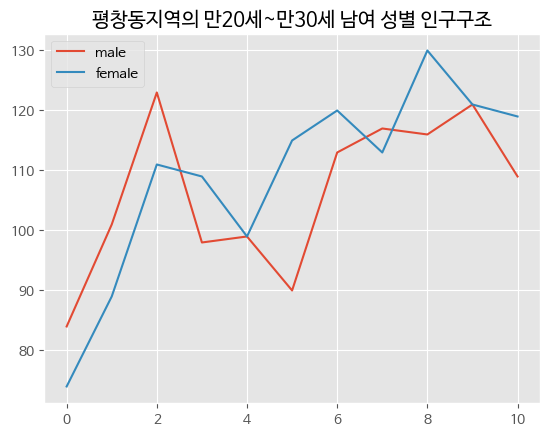

In [32]:
#from google.colab import files
#uploaded = files.upload()

import csv
file=open('age_gender.csv',encoding='cp949')
age=csv.reader(file)

m=[]
f=[]
size=[]

name=input('만20세 ~ 만30세 성별 인구 구조를 알고 싶은 행정구역이나 행정구역 코드를 입력하세요!!\n')

for row in age:
  if name in row[0]:
    size_m=0
    size_f=0
    for i in range(11): #20세~30세
      size_m+=int(row[i+23].replace(',','')) #남성 인구수 누적해서 합 구하기
      size_f+=int(row[i+126].replace(',','')) #여성 인구수 누적해서 합 구하기
    for i in row[23:34]: #남성 데이터 리스트 m에 저장 #만20세~만30세
      m.append(int(i.replace(',',''))) 
    for i in row[126:137]: #여성 데이터 리스트 f에 저장 #만20세~만30세
      f.append(int(i.replace(',','')))

size.append(size_m)
size.append(size_f)

print('male: ',size[0],', male list: ',m)
print('female: ',size[1],', female list: ',f)

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('font',family='NanumBarunGothic')
plt.title(name + '지역의 만20세~만30세 남여 성별 인구구조')
plt.plot(range(11),m,label='male') #꺽은선 그래프 시각화 plot()
plt.plot(range(11),f,label='female')
plt.legend()
plt.show()

과제_3. 서울의 기온 데이터를 분석하는 프로그램을 작성한다.
- 기간: 2022년 1월 1일부터 2022년 10월 10일
- 최저기온이 가장 낮았던 날짜와 그날의 최저 기온을 분석한다.
- 실행결과 예시
 - 2022년 서울에서 최저기온이 가장 낮았던 날씨는 2022-01-12일 이고, 그날의 최저 기온은 -11.3℃ 입니다.

In [35]:
#from google.colab import files
#uploaded = files.upload()

import csv 
file = open('temp_seoul.csv', encoding='cp949') 
temp = csv.reader(file) #csv 모듈 불러오기

next(temp) 

min_date='' #가장 기온이 낮았던 날짜 저장할 변수
min_temp=0 #최저 기온을 저장할 변수

for row in temp:
  if row[3] == "":
    row[3]=100 #빈 null 값을 최저 기온이 될 수 없는 100도 로 설정

  row[3] = float(row[3]) #문자열로 저장된 최저 기온 실수로 변환

  if min_temp > row[3]: #만약 지금까지 최저 기온보다 기온이 낮다면
    min_date = row[0] #최저 기온인 날짜 업데이트
    min_temp = row[3] #최저 기온 및 업데이트

print("2022년 서울에서 최저기온이 가장 낮았던 날짜는 " + min_date.strip()+"일 이고, 그날의 최저 기온은 " + str(min_temp) + "℃ 입니다.")


2022년 서울에서 최저기온이 가장 낮았던 날짜는 2022-01-12일 이고, 그날의 최저 기온은 -11.3℃ 입니다.
